In [11]:
import pandas as pd
from rdkit import Chem

In [5]:
df = pd.read_csv('../data/michael_addition/ma_dataset_thio_solvent.csv')
df

,Unnamed: 0,reaction_idx,uid,substrates,products,solvent,reaction_smiles,label,simulation_idx
0,0,0,0,[H][C@](N)(CS)C(O)=O.CC(=C)C(=O)OCC(O)COC(=O)C=C,C=C(C)C(=O)OCC(O)COC(=O)CCSCC(N)C(=O)O,Water,[H][C@](N)(CS)C(O)=O.CC(=C)C(=O)OCC(O)COC(=O)C...,1,0.0
1,1,0,1,[H][C@](N)(CS)C(O)=O.CC(=C)C(=O)OCC(O)COC(=O)C=C,C=CC(=O)OCC(O)COC(=O)C(C)CSCC(N)C(=O)O,Water,[H][C@](N)(CS)C(O)=O.CC(=C)C(=O)OCC(O)COC(=O)C...,0,0.0
2,2,1,2,COC1=CC=CC=C1S.CC1=C2[C@H]3OC(=O)C(=C)[C@@H]3C...,COc1ccccc1SCC1C(=O)OC2C3=C(C)C(=O)C=CC3(C)CCC12,Methanol,COC1=CC=CC=C1S.CC1=C2[C@H]3OC(=O)C(=C)[C@@H]3C...,1,0.0
3,3,1,3,COC1=CC=CC=C1S.CC1=C2[C@H]3OC(=O)C(=C)[C@@H]3C...,C=C1C(=O)OC2C3=C(C)C(=O)CC(Sc4ccccc4OC)C3(C)CCC12,Methanol,COC1=CC=CC=C1S.CC1=C2[C@H]3OC(=O)C(=C)[C@@H]3C...,0,0.0
4,4,1,4,COC1=CC=CC=C1S.CC1=C2[C@H]3OC(=O)C(=C)[C@@H]3C...,C=C1C(=O)OC2C1CCC1(C)C=CC(=O)C(C)C21Sc1ccccc1OC,Methanol,COC1=CC=CC=C1S.CC1=C2[C@H]3OC(=O)C(=C)[C@@H]3C...,0,0.0
...,...,...,...,...,...,...,...,...,...
207,207,158,207,O=C(NC1=CC=CC=C1)\C=C\C(=O)C1=CC2=C(CCCC2)C=C1...,O=C(CC(SCCO)C(=O)c1ccc2c(c1)CCCC2)Nc1ccccc1,Methanol,O=C(NC1=CC=CC=C1)\C=C\C(=O)C1=CC2=C(CCCC2)C=C1...,0,0.0
208,208,159,208,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCCS,COc1ccc(C(=O)C(CC(=O)Nc2ccccc2)SCCO)cc1,Methanol,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCC...,0,0.0
209,209,159,209,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCCS,COc1ccc(C(=O)CC(SCCO)C(=O)Nc2ccccc2)cc1,Methanol,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCC...,1,0.0
210,210,160,210,CCCCC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCCS,CCCCc1ccc(C(=O)CC(SCCO)C(=O)Nc2ccccc2)cc1,Methanol,CCCCC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.O...,1,0.0


In [6]:
reaction_idxs_to_keep = []

for reaction_idx in df['reaction_idx'].unique():
    length = len(df[df['reaction_idx'] == reaction_idx])
    if length == 2:
        reaction_idxs_to_keep.append(reaction_idx)
        
new_df = df[df['reaction_idx'].isin(reaction_idxs_to_keep)]
new_df

,Unnamed: 0,reaction_idx,uid,substrates,products,solvent,reaction_smiles,label,simulation_idx
0,0,0,0,[H][C@](N)(CS)C(O)=O.CC(=C)C(=O)OCC(O)COC(=O)C=C,C=C(C)C(=O)OCC(O)COC(=O)CCSCC(N)C(=O)O,Water,[H][C@](N)(CS)C(O)=O.CC(=C)C(=O)OCC(O)COC(=O)C...,1,0.0
1,1,0,1,[H][C@](N)(CS)C(O)=O.CC(=C)C(=O)OCC(O)COC(=O)C=C,C=CC(=O)OCC(O)COC(=O)C(C)CSCC(N)C(=O)O,Water,[H][C@](N)(CS)C(O)=O.CC(=C)C(=O)OCC(O)COC(=O)C...,0,0.0
62,62,21,62,C[C@H](CC=C)OC(=O)\C=C\C(=O)CCCC=C.[H][C@@](O)...,C=CCCCC(=O)C(CC(=O)OC(C)CC=C)SCC(O)C(=O)OC,CH2Cl2,C[C@H](CC=C)OC(=O)\C=C\C(=O)CCCC=C.[H][C@@](O)...,0,0.0
63,63,21,63,C[C@H](CC=C)OC(=O)\C=C\C(=O)CCCC=C.[H][C@@](O)...,C=CCCCC(=O)CC(SCC(O)C(=O)OC)C(=O)OC(C)CC=C,CH2Cl2,C[C@H](CC=C)OC(=O)\C=C\C(=O)CCCC=C.[H][C@@](O)...,1,0.0
64,64,23,64,SC1CCCCC1.[H]C(=C([H])C1=CC[C@]2([H])C(=C)C(=O...,C=C1C(=O)OC2CC(C)C(C(CC(C)=O)SC3CCCCC3)=CCC12,Methanol,SC1CCCCC1.[H]C(=C([H])C1=CC[C@]2([H])C(=C)C(=O...,0,0.0
...,...,...,...,...,...,...,...,...,...
207,207,158,207,O=C(NC1=CC=CC=C1)\C=C\C(=O)C1=CC2=C(CCCC2)C=C1...,O=C(CC(SCCO)C(=O)c1ccc2c(c1)CCCC2)Nc1ccccc1,Methanol,O=C(NC1=CC=CC=C1)\C=C\C(=O)C1=CC2=C(CCCC2)C=C1...,0,0.0
208,208,159,208,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCCS,COc1ccc(C(=O)C(CC(=O)Nc2ccccc2)SCCO)cc1,Methanol,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCC...,0,0.0
209,209,159,209,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCCS,COc1ccc(C(=O)CC(SCCO)C(=O)Nc2ccccc2)cc1,Methanol,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCC...,1,0.0
210,210,160,210,CCCCC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCCS,CCCCc1ccc(C(=O)CC(SCCO)C(=O)Nc2ccccc2)cc1,Methanol,CCCCC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.O...,1,0.0


In [7]:
new_df = new_df[new_df['solvent'] == 'Methanol']
new_df

,Unnamed: 0,reaction_idx,uid,substrates,products,solvent,reaction_smiles,label,simulation_idx
64,64,23,64,SC1CCCCC1.[H]C(=C([H])C1=CC[C@]2([H])C(=C)C(=O...,C=C1C(=O)OC2CC(C)C(C(CC(C)=O)SC3CCCCC3)=CCC12,Methanol,SC1CCCCC1.[H]C(=C([H])C1=CC[C@]2([H])C(=C)C(=O...,0,0.0
65,65,23,65,SC1CCCCC1.[H]C(=C([H])C1=CC[C@]2([H])C(=C)C(=O...,CC(=O)C=CC1=CCC2C(CC1C)OC(=O)C2CSC1CCCCC1,Methanol,SC1CCCCC1.[H]C(=C([H])C1=CC[C@]2([H])C(=C)C(=O...,1,0.0
66,66,46,66,OC(=O)\C=C\C(=O)C1=CC=C(Br)C=C1.OC(=O)CS,O=C(O)CSC(CC(=O)c1ccc(Br)cc1)C(=O)O,Methanol,OC(=O)\C=C\C(=O)C1=CC=C(Br)C=C1.OC(=O)CS>>O=C(...,1,0.0
67,67,46,67,OC(=O)\C=C\C(=O)C1=CC=C(Br)C=C1.OC(=O)CS,O=C(O)CSC(CC(=O)O)C(=O)c1ccc(Br)cc1,Methanol,OC(=O)\C=C\C(=O)C1=CC=C(Br)C=C1.OC(=O)CS>>O=C(...,0,0.0
122,122,74,122,OC(=O)\C=C\C(=O)C1=CC=CC=C1.OC(=O)CS,O=C(O)CSC(CC(=O)O)C(=O)c1ccccc1,Methanol,OC(=O)\C=C\C(=O)C1=CC=CC=C1.OC(=O)CS>>O=C(O)CS...,0,0.0
...,...,...,...,...,...,...,...,...,...
207,207,158,207,O=C(NC1=CC=CC=C1)\C=C\C(=O)C1=CC2=C(CCCC2)C=C1...,O=C(CC(SCCO)C(=O)c1ccc2c(c1)CCCC2)Nc1ccccc1,Methanol,O=C(NC1=CC=CC=C1)\C=C\C(=O)C1=CC2=C(CCCC2)C=C1...,0,0.0
208,208,159,208,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCCS,COc1ccc(C(=O)C(CC(=O)Nc2ccccc2)SCCO)cc1,Methanol,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCC...,0,0.0
209,209,159,209,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCCS,COc1ccc(C(=O)CC(SCCO)C(=O)Nc2ccccc2)cc1,Methanol,COC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCC...,1,0.0
210,210,160,210,CCCCC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.OCCS,CCCCc1ccc(C(=O)CC(SCCO)C(=O)Nc2ccccc2)cc1,Methanol,CCCCC1=CC=C(C=C1)C(=O)\C=C\C(=O)NC1=CC=CC=C1.O...,1,0.0


In [8]:
new_df.to_csv('../data/michael_addition/ma_dataset_thio_small_methanol.csv')

In [9]:
index = 5

substrates, products = df['reaction_smiles'].values[index].split('>>')
substrates

'COC1=CC=C(S)C=C1.CC1=C2[C@H]3OC(=O)C(=C)[C@@H]3CC[C@@]2(C)C=CC1=O'

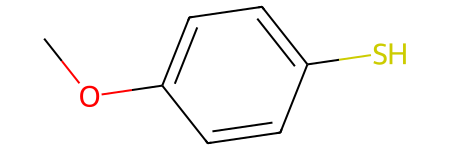

In [12]:
Chem.MolFromSmiles(substrates.split('.')[0])

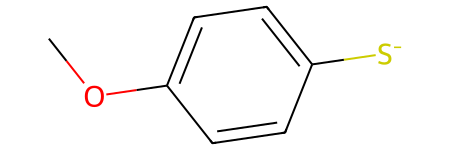

In [13]:
Chem.MolFromSmiles(substrates.split('.')[0].replace('S', '[S-]'))